# Iman Noor
---

# **Evaluation Techniques for classification models**

Evaluation techniques for classification models help assess their performance and ensure they make accurate predictions. Key techniques include:

1. **Confusion Matrix:**
    A table showing true positives, true negatives, false positives, and false negatives, providing a detailed breakdown of classification results.
    
2. **Accuracy:**
    The ratio of correctly predicted instances to the total number of instances. It gives a general sense of how often the model is correct.
    
3. **Precision:**
    The ratio of true positives to the sum of true positives and false positives. It measures the accuracy of positive predictions.
    
4. **Recall (Sensitivity):**
    The ratio of true positives to the sum of true positives and false negatives. It measures the ability to identify all positive instances.
    
5. **F1 Score:**
    The harmonic mean of precision and recall. It balances precision and recall, especially useful when dealing with imbalanced datasets.
    
6. **ROC Curve:**
    A graphical representation of the true positive rate versus the false positive rate at various thresholds. It helps evaluate the trade-offs between true positives and false positives.
    
7. **AUC (Area Under the Curve):**
    Measures the overall performance of the ROC curve. An AUC of 1 indicates a perfect model, while an AUC of 0.5 indicates a model with no discrimination ability.
    
8. **Cross-Validation:**
    Splits the dataset into multiple folds to train and test the model on different subsets, providing a more robust estimate of model performance.
    
9. **Classification Report:**
    A summary of precision, recall, F1 score, and support for each class, offering a comprehensive view of the model’s performance across different classes.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Data Preparation

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Split training and testing data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train a logistic regression model


In [6]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Predictions

In [7]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

---
## **1. Confusion Matrix:**
The confusion matrix breaks down the classification results, showing a summary of the performance of the predictions against the actuals.
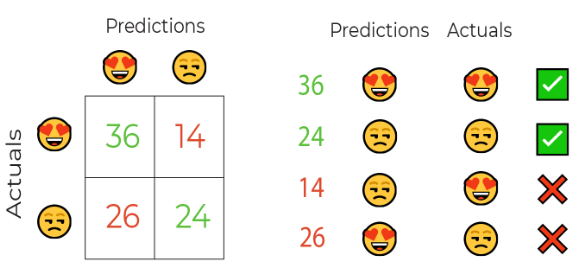

### **Structure of the Confusion Matrix**
For a binary classification problem, the confusion matrix is a 2x2 table with the following components:

- **True Positive (TP):** The number of correctly predicted positive instances.
- **False Negative (FN):** The number of positive instances that were incorrectly predicted as negative.
- **False Positive (FP):** The number of negative instances that were incorrectly predicted as positive.
- **True Negative (TN):** The number of correctly predicted negative instances.

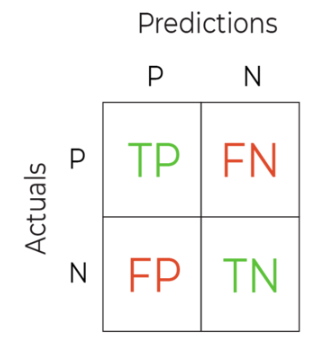

In [8]:
from sklearn.metrics import confusion_matrix

Confusion Matrix:
 [[ 61   2]
 [  2 106]]


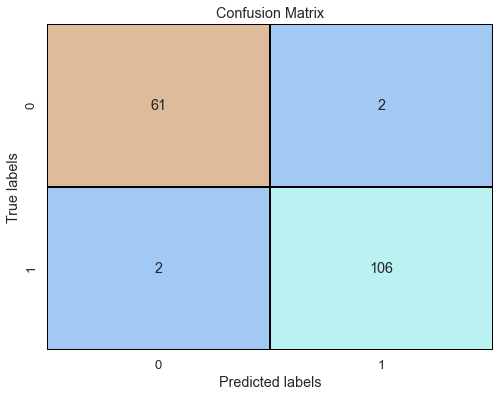

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
custom_palette = sns.color_palette("pastel")
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_palette, cbar=False, linewidths=1, linecolor='black')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

---
## **2. Accuracy:**
Accuracy is one of the most commonly used metrics to evaluate the performance of a classification model. It represents the proportion of correctly classified instances among the total number of instances.
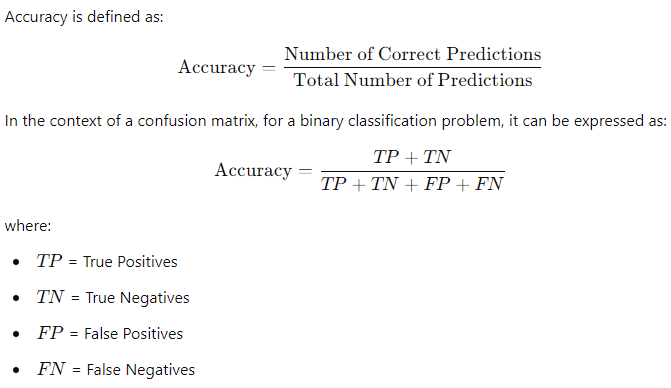


In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9766081871345029


---
## **3. Precision:**
Precision is used to evaluate the performance of a classification model, particularly in situations where the cost of false positives is high. It measures the accuracy of the positive predictions made by the model, i.e., out of all instances predicted as positive, how many are actually positive.
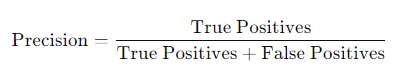

In [12]:
from sklearn.metrics import precision_score

In [13]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9814814814814815


---
## **4. Recall:**
Recall, also known as **sensitivity** or **true positive rate**, is  used to evaluate the performance of a classification model, particularly in situations where identifying all positive instances is crucial. Recall measures the model’s ability to correctly identify all relevant instances (i.e., all actual positive cases).
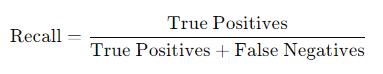

In [14]:
from sklearn.metrics import recall_score

In [15]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9814814814814815


---
## **5. F1 Score:**
F1 Score is used to evaluate the performance of a classification model, especially when the class distribution is imbalanced or when both precision and recall are important. It is the harmonic mean of precision and recall, providing a single metric that balances the trade-off between the two.

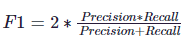

In [16]:
from sklearn.metrics import f1_score

In [17]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9814814814814815


---
## **6. AUC & ROC:**

**AUC** stands for **Area Under the ROC Curve** and is used to evaluate the performance of binary classification models. The ROC (Receiver Operating Characteristic) curve is a graphical representation that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

#### Definition

- **ROC Curve**: The ROC curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings.
  - **True Positive Rate (TPR)**, also known as **Recall**, is given by:
    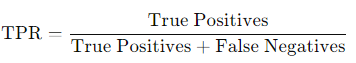
  - **False Positive Rate (FPR)** is given by:
    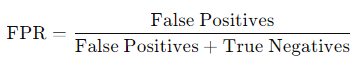

- **AUC**: The Area Under the ROC Curve measures the entire two-dimensional area underneath the entire ROC curve. AUC ranges from 0 to 1.
  - **AUC = 1**: Perfect model.
  - **AUC = 0.5**: Model with no discrimination capability (random guessing).
  - **AUC < 0.5**: Model performing worse than random guessing.



| **Instance** | **Predicted Probability (Positive Class)** | **Actual Label** |
|--------------|---------------------------------------------|------------------|
| 1            | 0.9                                         | 1                |
| 2            | 0.8                                         | 1                |
| 3            | 0.7                                         | 0                |
| 4            | 0.4                                         | 0                |
| 5            | 0.3                                         | 1                |
| 6            | 0.2                                         | 0                |

By varying the threshold, we can plot the TPR and FPR to create the ROC curve. The AUC measures the entire area under this curve. 

#### Importance of AUC

- **Threshold Independence**: AUC is independent of the classification threshold, making it a robust metric for comparing models.
- **Balanced Performance**: It takes into account both the TPR and FPR, providing a balanced measure of model performance.

In [18]:
from sklearn.metrics import roc_curve, auc

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

AUC: 0.9976484420928865


### Understanding the ROC Curve

- **X-Axis**: False Positive Rate (FPR), which ranges from 0 to 1.
- **Y-Axis**: True Positive Rate (TPR), which also ranges from 0 to 1.
- **Point (0,1)**: Represents perfect classification, with 100% true positives and 0% false positives.
- **Diagonal Line (y = x)**: Represents random guessing, where the TPR equals the FPR.
- **The closer the ROC curve is to the top-left corner**, the better the model's performance.


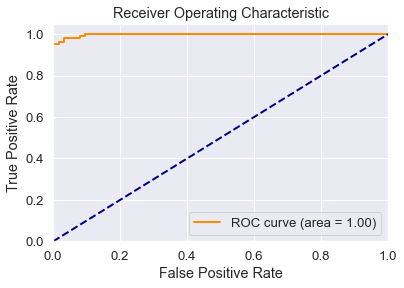

In [20]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

---
## **8. Cross-Validation:**

**Cross-validation** is a technique for assessing the performance and generalizability of a machine learning model. It involves splitting the dataset into multiple subsets, training the model on some subsets, and testing it on others. This helps ensure that the model performs well on unseen data and is not overfitting to the training data.

### Key Types

1. **k-Fold Cross-Validation**:
   - Split the data into `k` equal parts (folds).
   - Train the model on `k-1` folds and test on the remaining fold.
   - Repeat `k` times, each time using a different fold as the test set.
   - Average the results to get the final performance metric.

2. **Stratified k-Fold Cross-Validation**:
   - Similar to k-Fold but ensures each fold has a similar class distribution to the entire dataset.
   - Useful for imbalanced datasets.

3. **Leave-One-Out Cross-Validation (LOOCV)**:
   - Each data point is used once as a test set while the remaining points form the training set.
   - Computationally intensive but useful for small datasets.

4. **Holdout Method**:
   - Split the data into a single training set and a single test set.
   - Simple but less reliable due to potential high variance.

#### Example: k-Fold Cross-Validation (k=5)

1. Split dataset into 5 folds.
2. Train on 4 folds, test on the 1 remaining fold.
3. Repeat 5 times, each time with a different test fold.
4. Average the 5 test results to evaluate the model's performance.


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.93859649 0.94736842 0.98245614 0.92982456 0.96460177]
Mean CV Score: 0.9525694767893184


---
## **9. Classification Report:**

Classification Report is a comprehensive summary of the key metrics used to evaluate the performance of a classification model. It includes 
- Precision
- Recall
- F1-score
- Support 
for each class in a multi-class classification problem. 

In [23]:
from sklearn.metrics import classification_report

In [24]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# **The End :)**